In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


In [2]:
# DATA load
X = pd.read_csv('./content/loan_train_preprocessed.csv')

# backward
X = X[['term', 'initial_list_status', 'int_rate', 
'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 
'inq_last_6mths', 'revol_util', 'recoveries', 
'collection_recovery_fee', 'tot_cur_bal', 
'home_ownershipRENT', 'purposesmall_business', 
'purposewedding', 'earliest_cr_line2000']]


y = pd.read_csv('./content/loan_train_label.csv')
y = y.drop(['id'], axis=1)

In [3]:
# Dividing the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20 )
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.20 )

x_train.shape,y_train.shape,x_val.shape,y_val.shape,x_test.shape,y_test.shape



((10240, 16), (10240, 1), (2560, 16), (2560, 1), (3200, 16), (3200, 1))

In [4]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [5]:
# XGBoost training

evals = [(x_val, y_val)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(x_train , y_train,  early_stopping_rounds=100, eval_set=evals, eval_metric="logloss",  verbose=True)

y_preds = xgb_wrapper.predict(x_test)
y_pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

[0]	validation_0-logloss:0.67111
[1]	validation_0-logloss:0.65272
[2]	validation_0-logloss:0.63759
[3]	validation_0-logloss:0.62455
[4]	validation_0-logloss:0.61353
[5]	validation_0-logloss:0.60409
[6]	validation_0-logloss:0.59571
[7]	validation_0-logloss:0.58874
[8]	validation_0-logloss:0.58236
[9]	validation_0-logloss:0.57711
[10]	validation_0-logloss:0.57222
[11]	validation_0-logloss:0.56810
[12]	validation_0-logloss:0.56464
[13]	validation_0-logloss:0.56114
[14]	validation_0-logloss:0.55847
[15]	validation_0-logloss:0.55586
[16]	validation_0-logloss:0.55360
[17]	validation_0-logloss:0.55151
[18]	validation_0-logloss:0.54945
[19]	validation_0-logloss:0.54779
[20]	validation_0-logloss:0.54606
[21]	validation_0-logloss:0.54492
[22]	validation_0-logloss:0.54358
[23]	validation_0-logloss:0.54250
[24]	validation_0-logloss:0.54134
[25]	validation_0-logloss:0.54061


c:\Users\sjsko\PycharmProjects\Investment_engineering\venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sjsko\PycharmProjects\Investment_engineering\venv\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sjsko\PycharmProjects\Investment_engineering\venv\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

[26]	validation_0-logloss:0.53974
[27]	validation_0-logloss:0.53880
[28]	validation_0-logloss:0.53794
[29]	validation_0-logloss:0.53742
[30]	validation_0-logloss:0.53675
[31]	validation_0-logloss:0.53604
[32]	validation_0-logloss:0.53551
[33]	validation_0-logloss:0.53511
[34]	validation_0-logloss:0.53471
[35]	validation_0-logloss:0.53421
[36]	validation_0-logloss:0.53363
[37]	validation_0-logloss:0.53328
[38]	validation_0-logloss:0.53293
[39]	validation_0-logloss:0.53267
[40]	validation_0-logloss:0.53235
[41]	validation_0-logloss:0.53205
[42]	validation_0-logloss:0.53187
[43]	validation_0-logloss:0.53184
[44]	validation_0-logloss:0.53134
[45]	validation_0-logloss:0.53121
[46]	validation_0-logloss:0.53097
[47]	validation_0-logloss:0.53082
[48]	validation_0-logloss:0.53064
[49]	validation_0-logloss:0.53060
[50]	validation_0-logloss:0.53034
[51]	validation_0-logloss:0.53008
[52]	validation_0-logloss:0.53002
[53]	validation_0-logloss:0.53012
[54]	validation_0-logloss:0.52998
[55]	validatio

In [6]:
get_clf_eval(y_test, y_preds, y_pred_proba)

오차 행렬
[[1101  457]
 [ 567 1075]]
정확도: 0.6800, 정밀도: 0.7017, 재현율: 0.6547,    F1: 0.6774, AUC:0.7700


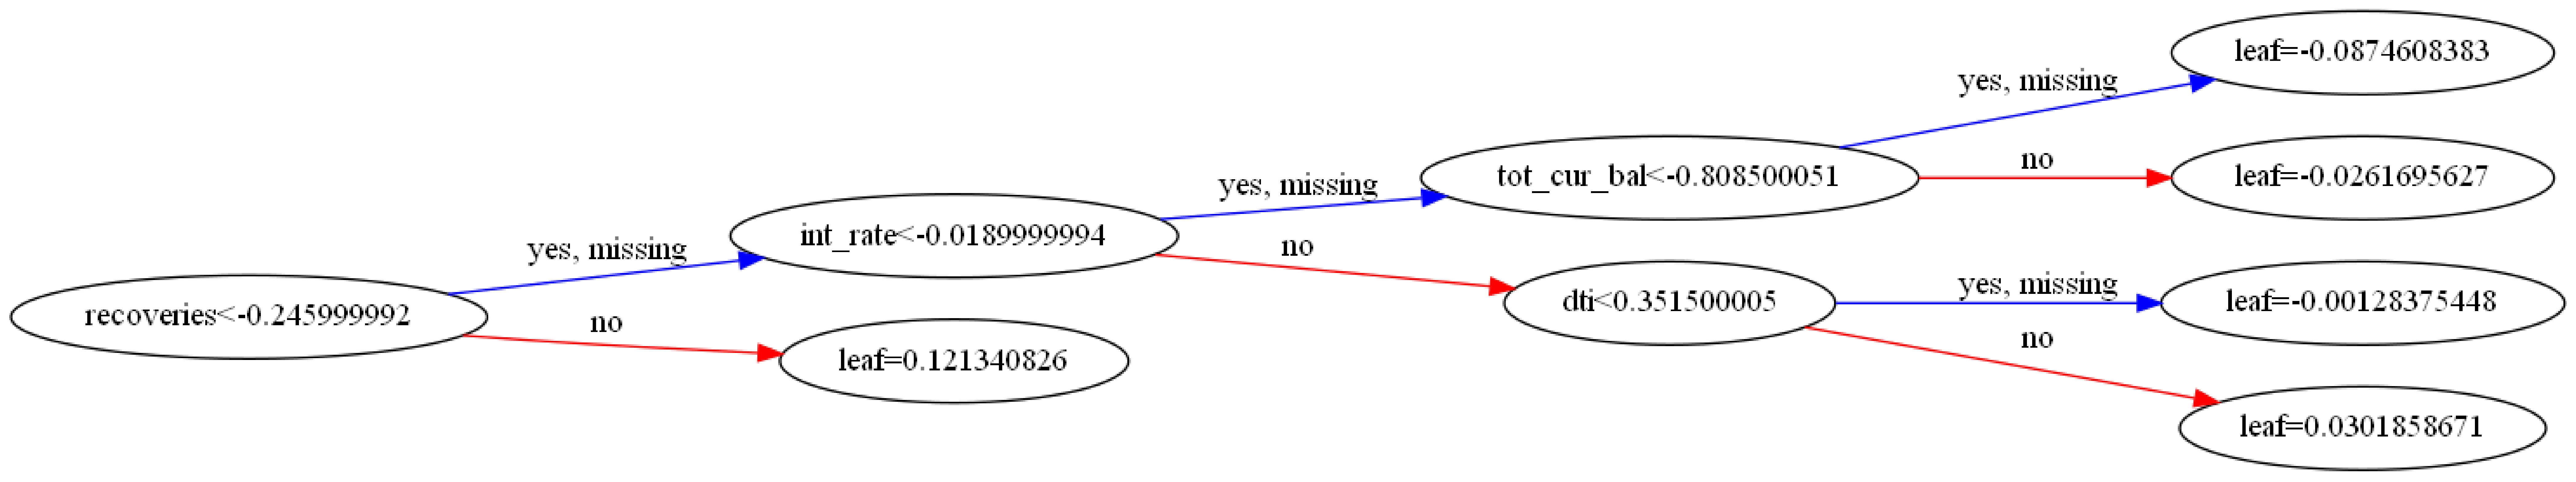

In [7]:
  import xgboost as xgb
  import matplotlib.pyplot as plt

  # num_trees : 그림을 여러개 그릴시 그림 번호
  # rankdir : 트리의 방향, 디폴트는 위아래 방향
  # rankdir="LR" : 왼쪽에서 오른쪽 방향으로 트리를 보여준다.
  xgb.plot_tree(xgb_wrapper, num_trees=10, rankdir='LR')

  fig = plt.gcf()
  fig.set_size_inches(150, 100)

  # 이미지 저장하고 싶다면
  # fig.savefig('tree.png')

  plt.show()

# make prediction

In [8]:
# DATA load
origin_X = pd.read_csv('./content/loan_test_preprocessed.csv')

# backward
target_X = target_X[['term', 'initial_list_status', 'int_rate', 
'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 
'inq_last_6mths', 'revol_util', 'recoveries', 
'collection_recovery_fee', 'tot_cur_bal', 
'home_ownershipRENT', 'purposesmall_business', 
'purposewedding', 'earliest_cr_line2000']]


target_y = pd.read_csv('./content/loan_test_label.csv')

In [9]:
y_preds = xgb_wrapper.predict(target_X)
y_pred_proba = xgb_wrapper.predict_proba(target_X)[:, 1]

In [10]:
origin_X

,id,loan_status,term,initial_list_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,...,purposerenewable_energy,purposevacation,purposeeducational,earliest_cr_line2010,earliest_cr_line1990,earliest_cr_line2000,earliest_cr_line1970,earliest_cr_line1980,earliest_cr_line1960,earliest_cr_line1950
0,16001,0,1,0,-1.459,-1.458,-1.448,-0.199,-1.459,1.715,...,0,0,0,0,1,0,0,0,0,0
1,16002,0,0,1,0.635,0.638,0.644,1.093,0.344,-1.019,...,0,0,0,0,0,1,0,0,0,0
2,16003,0,1,0,-0.480,-0.478,-0.471,0.164,-0.286,-0.563,...,0,0,0,0,0,0,1,0,0,0
3,16004,0,1,0,0.254,0.257,0.264,-1.473,0.348,1.487,...,0,0,0,0,0,0,0,1,0,0
4,16005,0,0,0,-0.555,-0.553,-0.565,-0.130,-0.845,0.006,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,19996,0,0,1,-0.495,-0.493,-0.485,0.877,-0.694,-1.361,...,0,0,0,0,0,1,0,0,0,0
3996,19997,0,0,0,0.635,0.638,0.644,0.380,0.201,-0.791,...,0,0,0,0,1,0,0,0,0,0
3997,19998,0,1,1,-0.555,-0.553,-0.545,-1.475,-0.518,2.285,...,0,0,0,0,1,0,0,0,0,0
3998,19999,0,1,0,2.419,2.424,2.428,-1.364,2.699,2.285,...,0,0,0,0,0,1,0,0,0,0


In [16]:
target_y

,id,loan_status
0,16001,0
1,16002,1
2,16003,1
3,16004,0
4,16005,0
...,...,...
3995,19996,1
3996,19997,1
3997,19998,0
3998,19999,0


In [17]:
list(y_preds)

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


In [15]:
target_y['loan_status'] = y_preds

In [20]:
target_y.to_csv('./content/loan_test_prediction.csv', index=False)